In [1]:
import sys
import os.path
import numpy as np
import pandas as pd
import wave
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.backends.backend_pdf import PdfPages
from collections import OrderedDict
from scipy import signal
from scipy.optimize import curve_fit 
from functools import wraps

# ディレクトリの絶対パスを取得
current_dir = os.path.dirname(os.path.abspath("__file__"))
# モジュールのあるパスを追加
sys.path.append( str(current_dir) + '/../../programs' )

get_ipython().run_line_magic('matplotlib', 'inline')
%matplotlib inline

plt.rcParams['font.family'] ='IPAPGothic' #使用するフォント
plt.rcParams['xtick.direction'] = 'in' #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in' #y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.top'] = True #x軸の目盛線の上側を表示
plt.rcParams['ytick.right'] = True #y軸の目盛線の右側を表示
plt.rcParams['xtick.major.width'] = 1.0 #x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0 #y軸主目盛り線の線幅
plt.rcParams['font.size'] = 11 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 1.0 #軸の線幅edge linewidth。囲みの太さ
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['figure.dpi'] = 100 #dpiの設定
plt.rcParams['figure.subplot.hspace'] = 0.3 # 図と図の幅
plt.rcParams['figure.subplot.wspace'] = 0.3 # 図と図の幅

fig = plt.figure(figsize=(8, 11))

<Figure size 800x1100 with 0 Axes>

In [2]:
import decorators
import plot_tool
import research_tools
import wave_process

Window Not Found


## 加工前の音声

In [3]:
wav = wave_process.wave_process("../../sample_wav/fukushima.wav")

分析対象ファイル： ../../sample_wav/fukushima.wav
チャンクサイズ： 3098892
サンプルサイズのバイト数： 2
チャンネル数： 1
wavファイルのサンプリング周波数： 48000
パラメータ :  _wave_params(nchannels=1, sampwidth=2, framerate=48000, nframes=3098892, comptype='NONE', compname='not compressed')
wavファイルのデータ個数： 3098892


In [4]:
wav_row = research_tools.ResearchTools(y=wav.data[:524288], fft_N=524288, stft_N=256, fs=wav.fs, window="hamming")

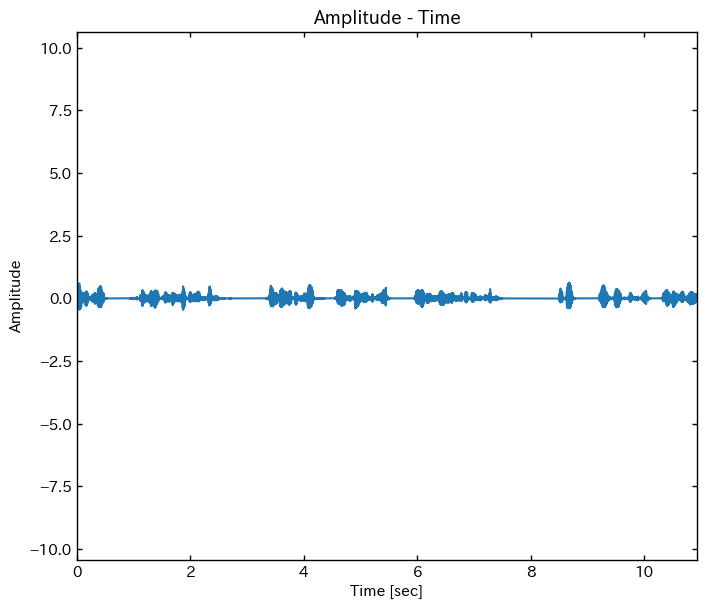

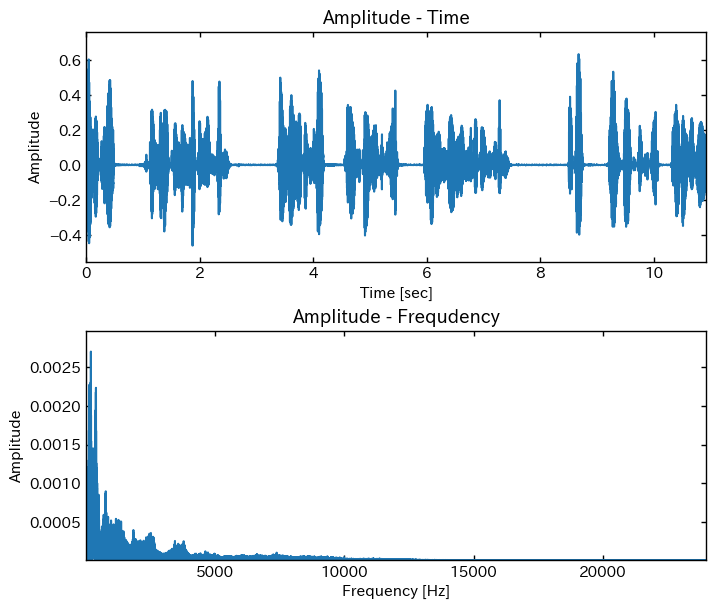

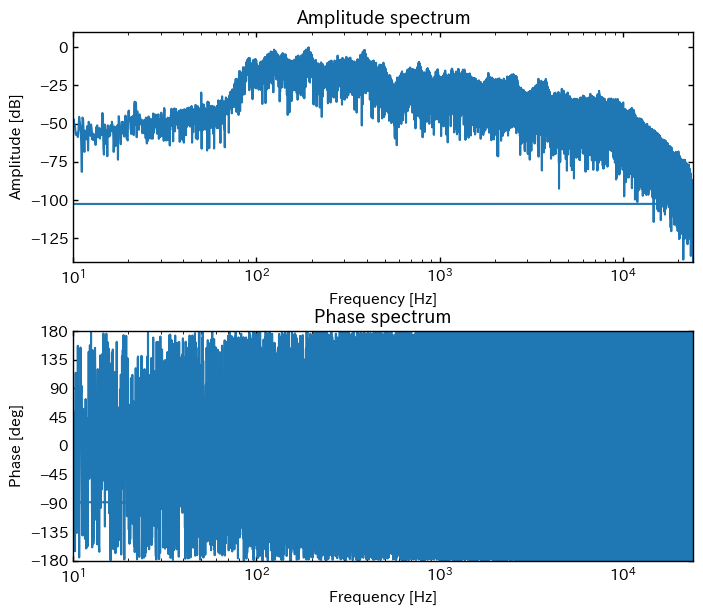

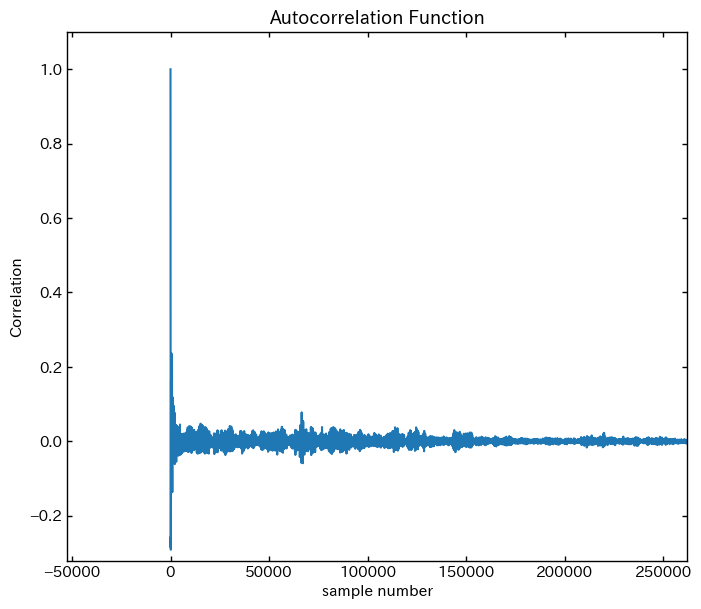

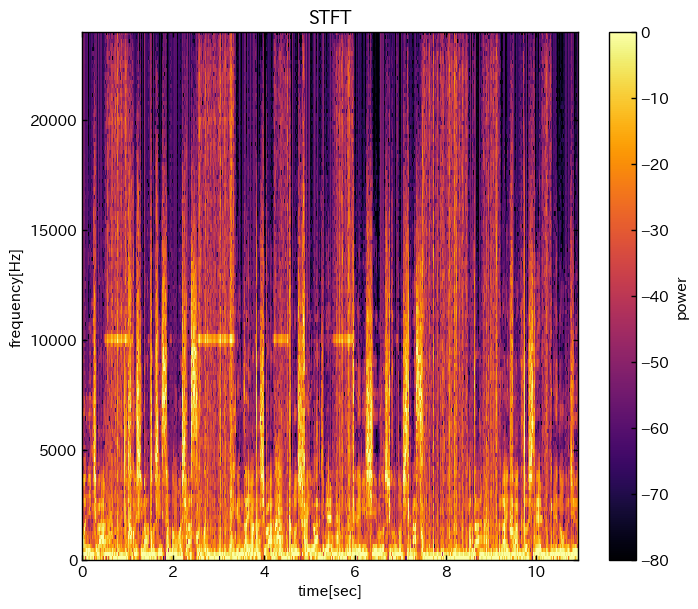

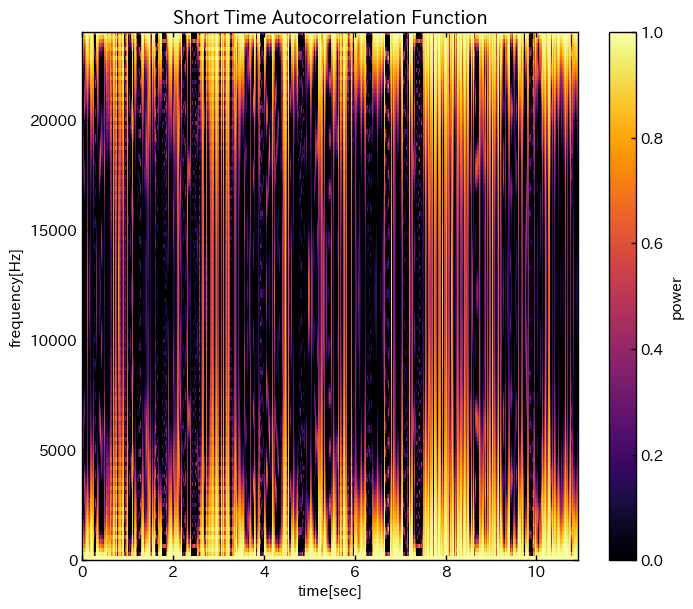

In [5]:
wav_row.plot_all()

## noise付加

In [6]:
N = 2**19  # サンプル数 528244
fs = wav.fs
dt = 1/fs            # サンプリング周期 [s]
f1, f2, f3 = 100, 1000, 3000 # 周波数 [Hz]

t = np.arange(0, N*dt, dt) # 時間 [s]
wav_noise = wav.data[:N] + 0.3 * np.sin(2*np.pi*f2*t)

In [7]:
wav.wave_write(filename="../../sample_wav/fuku_1k_noise.wav", data_array=wav_noise)

In [8]:
# BEF設計
filter2 = signal.firwin(numtaps=5001, cutoff=[950, 1050], width=None, 
                            window='hamming', pass_zero=True, 
                            scale=True, nyq=None, fs=fs)

In [9]:
wav_noise_gragh = research_tools.ResearchTools(y=wav_noise, fs=fs, fft_N=N, window="hamming")

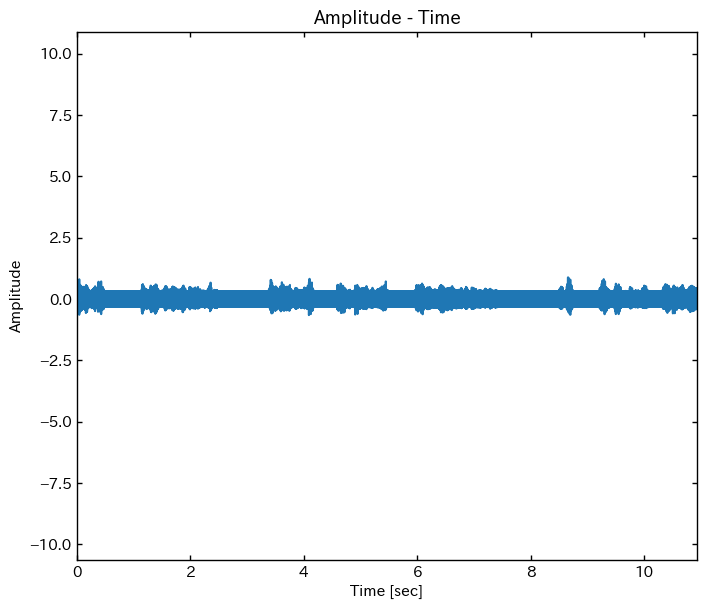

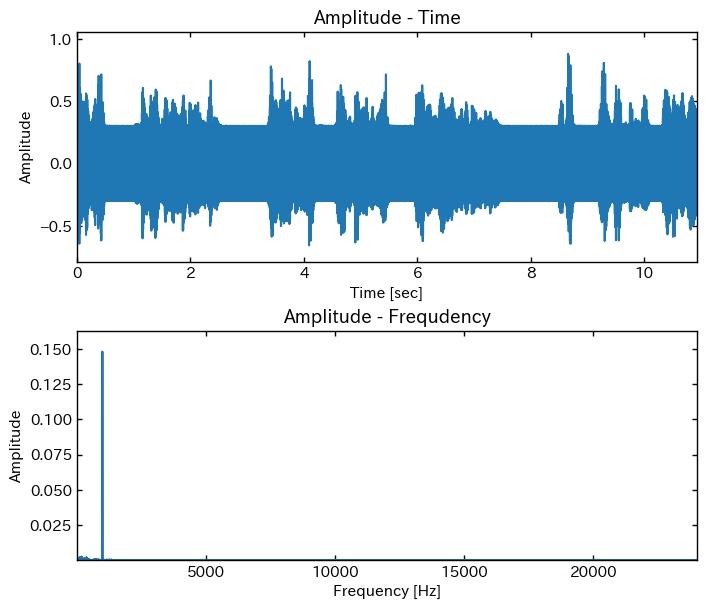

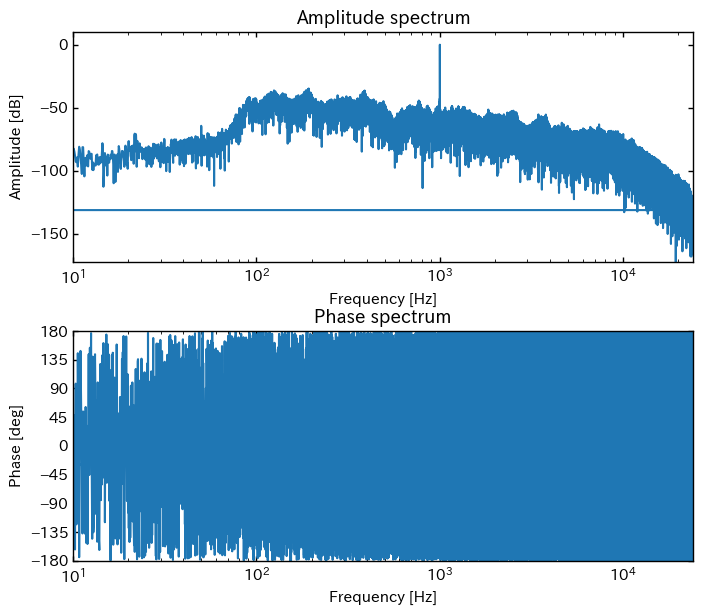

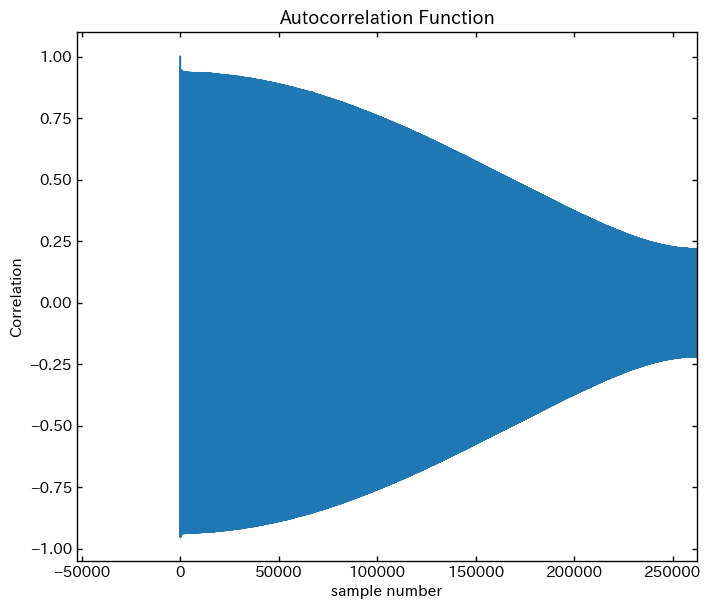

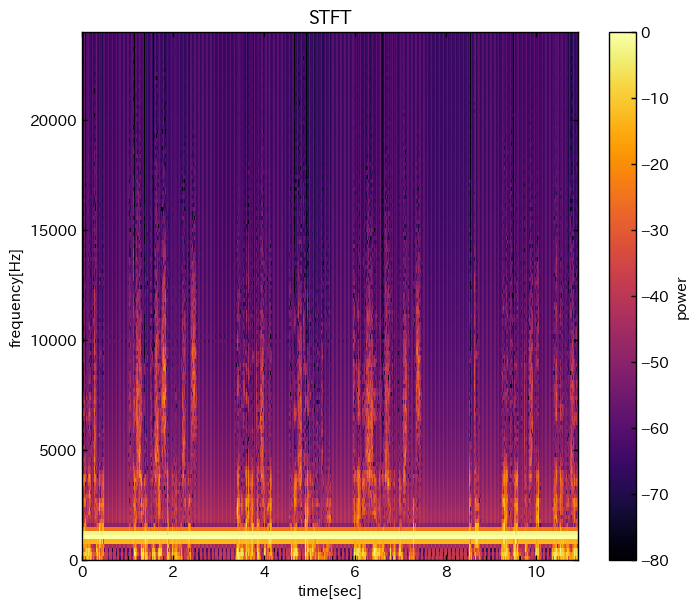

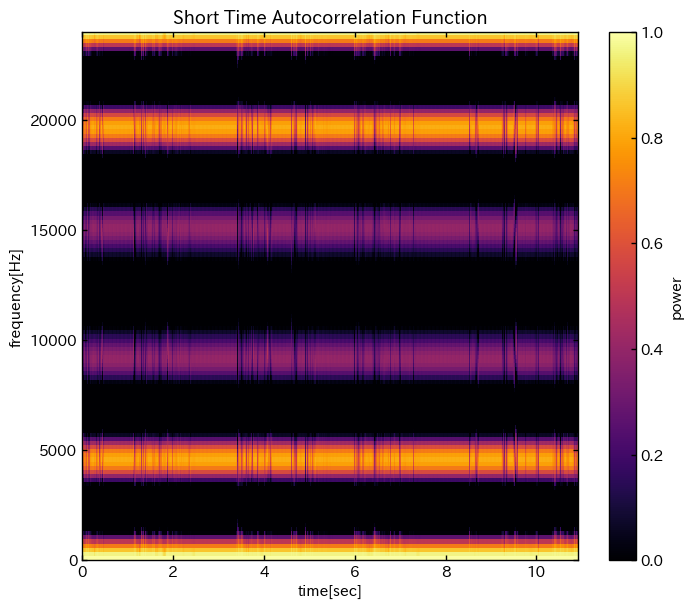

In [10]:
wav_noise_gragh.plot_all()

## フィルタ適用後

In [25]:
wav_bef_adapted = signal.lfilter(b=filter2, a=1, x=wav_noise)

In [26]:
wav_bef_adapted_graph = research_tools.ResearchTools(y=wav_bef_adapted, fs=fs, fft_N=N, window="hamming")

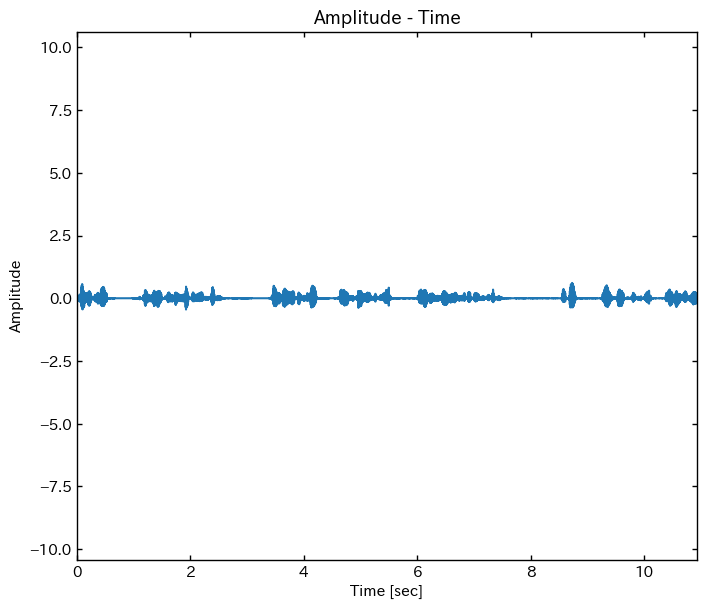

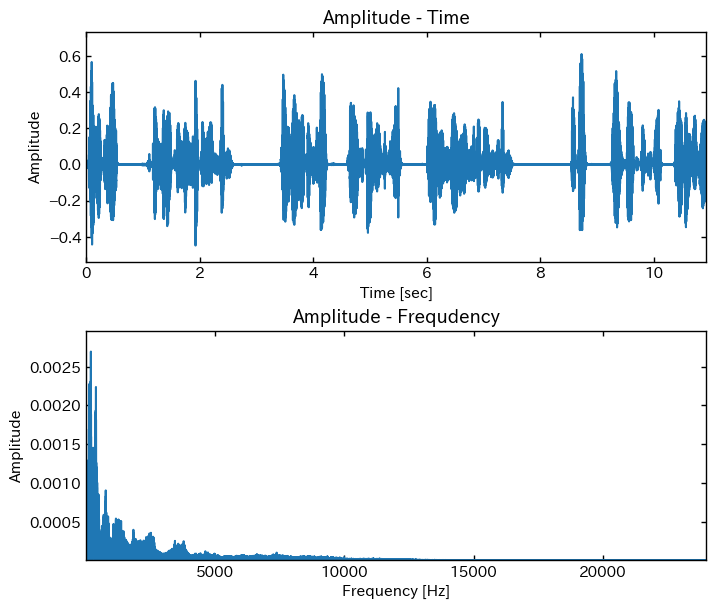

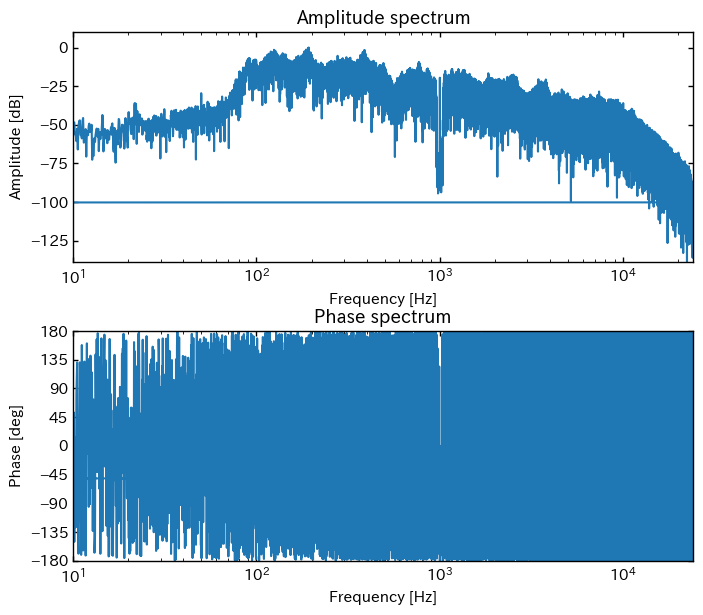

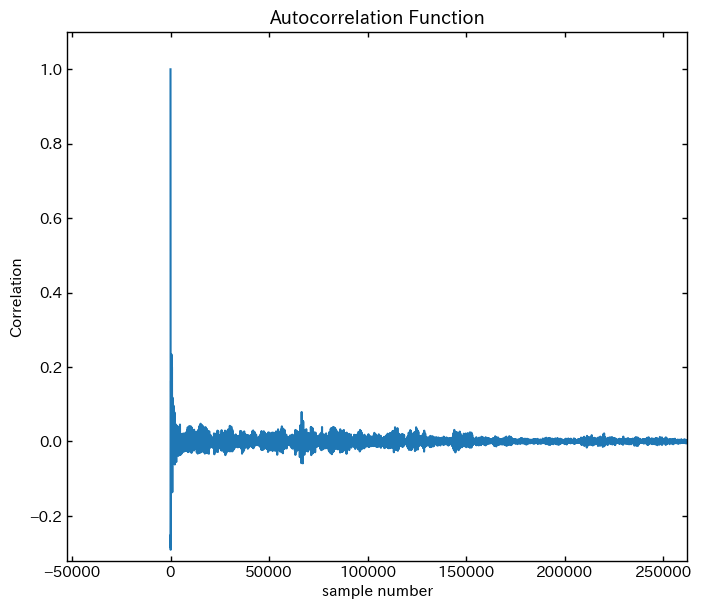

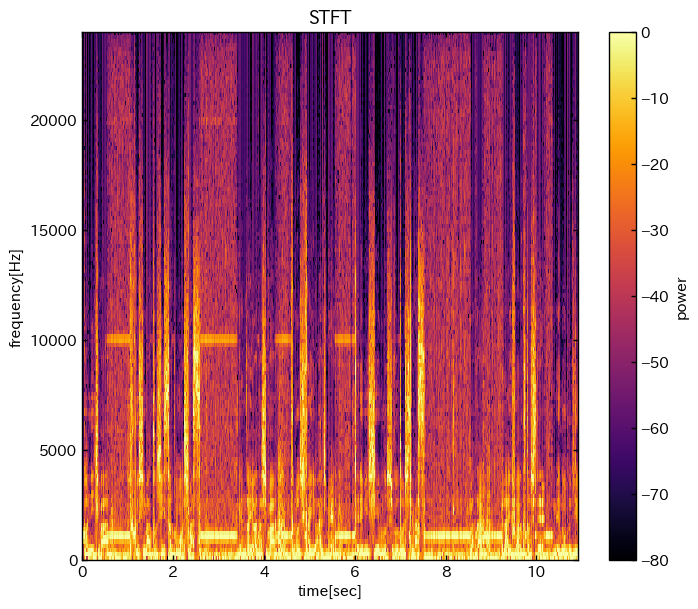

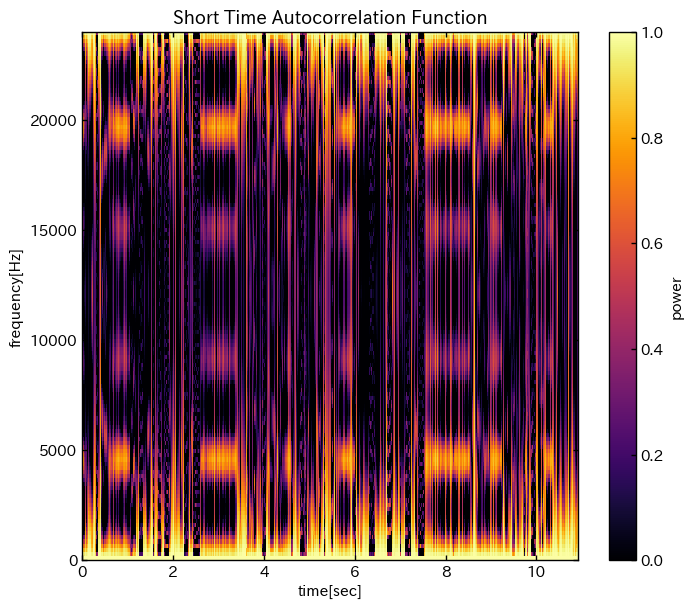

In [27]:
wav_bef_adapted_graph.plot_all()

In [14]:
wav.wave_write(filename="../../sample_wav/fuku_1k_bef_adapted.wav", data_array=wav_bef_adapted)

In [15]:
bef_cof_graph = research_tools.ResearchTools(filter2, fs=fs, fft_N=len(filter2), window="hamming")

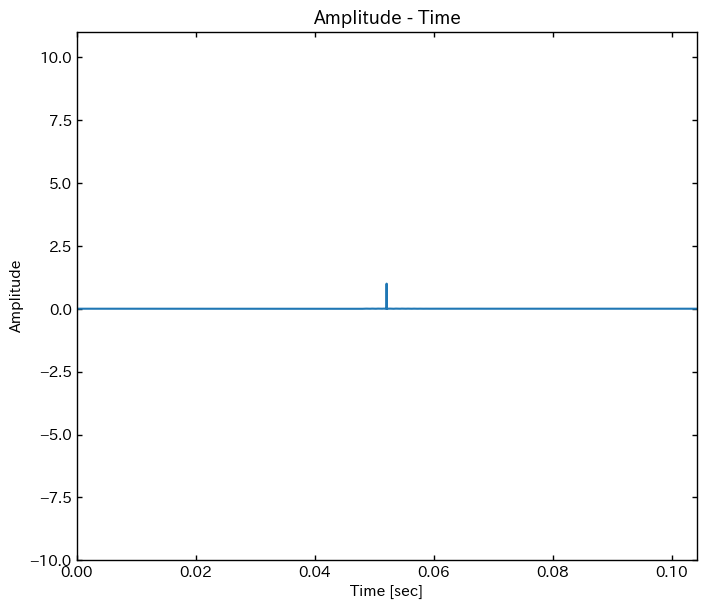

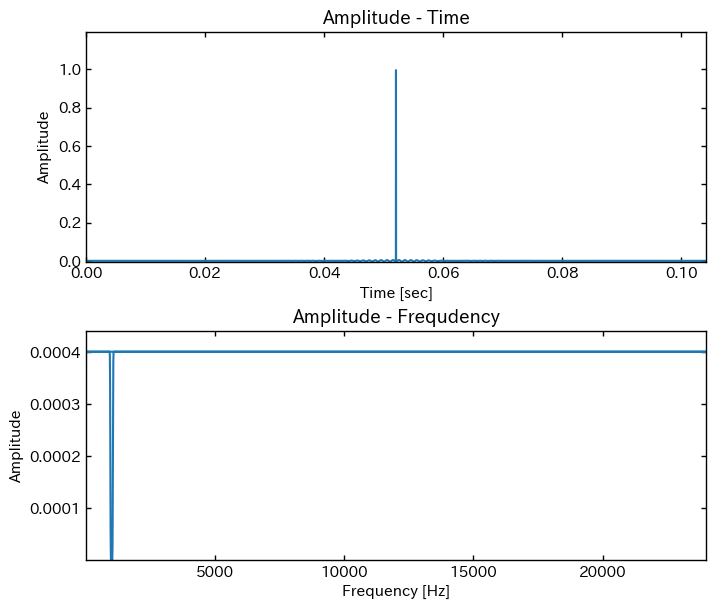

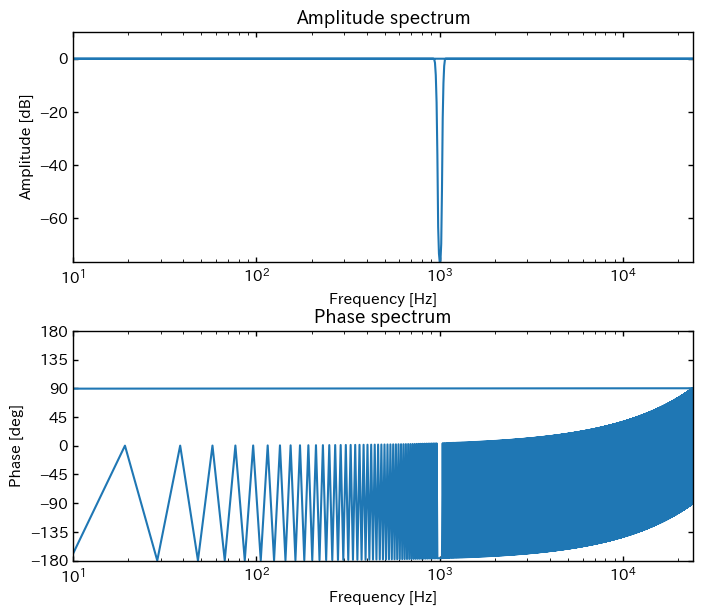

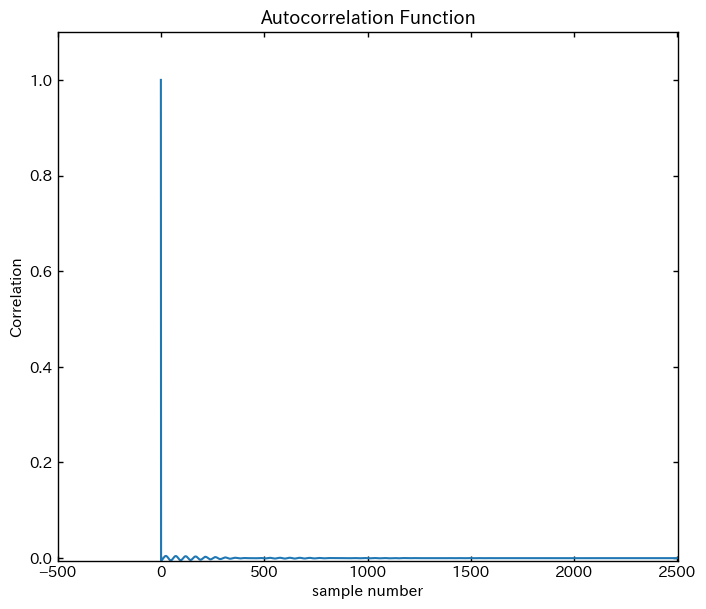

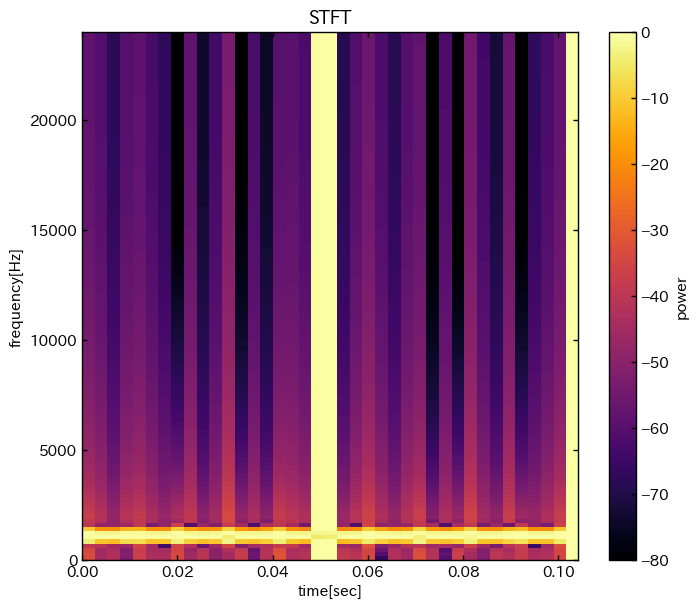

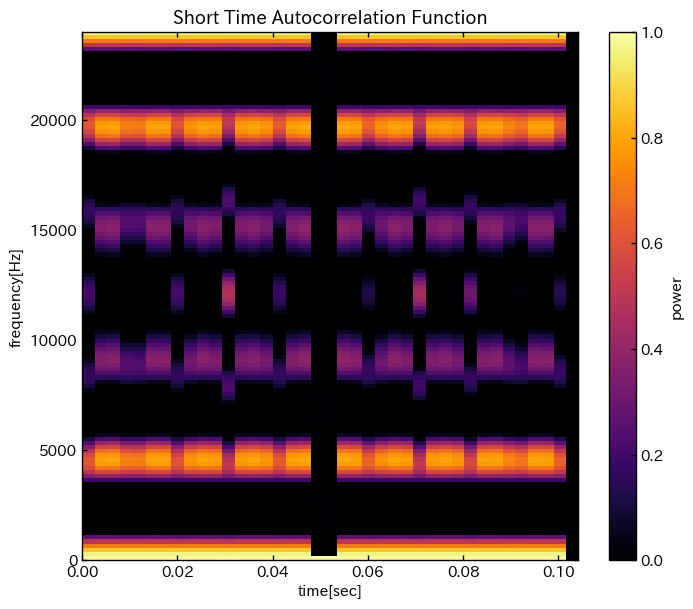

In [16]:
bef_cof_graph.plot_all()

# White Noiseに適応してみる

## White Noiseを作成

In [17]:
white_noise = np.random.rand(N)

In [18]:
white_noise.shape

(524288,)

# White Noiseをグラフ化

In [19]:
white_noise_gragh = research_tools.ResearchTools(y=white_noise, fs=fs, fft_N=N, window="hamming")

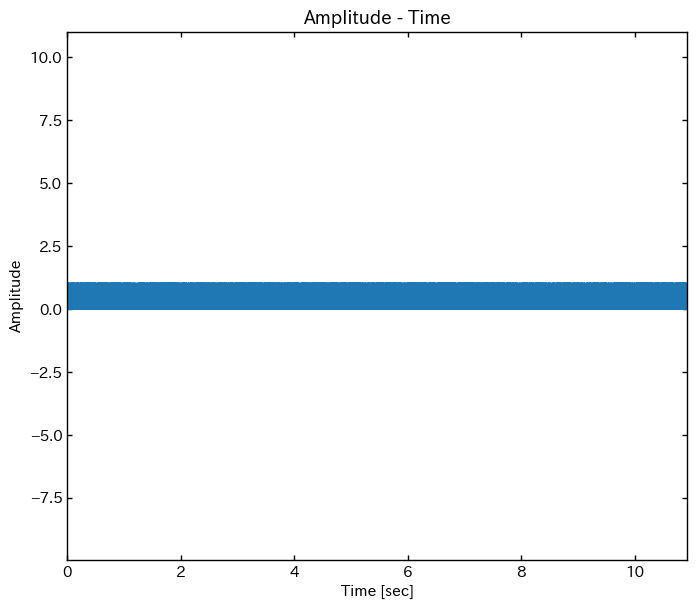

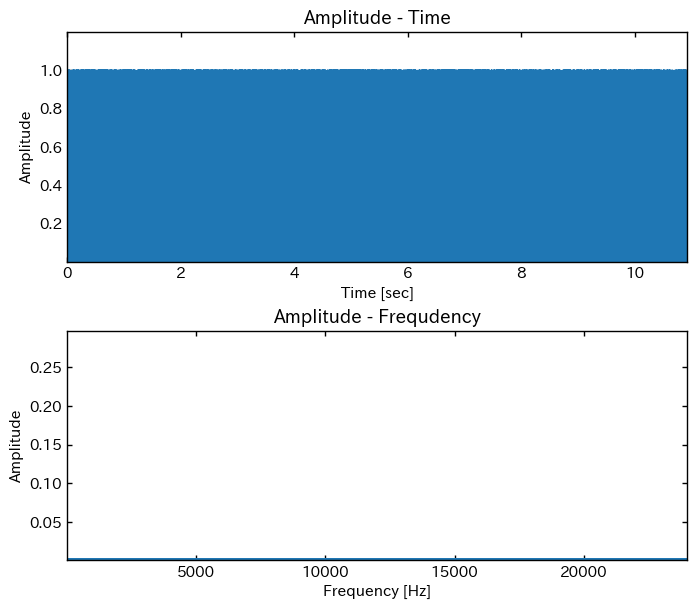

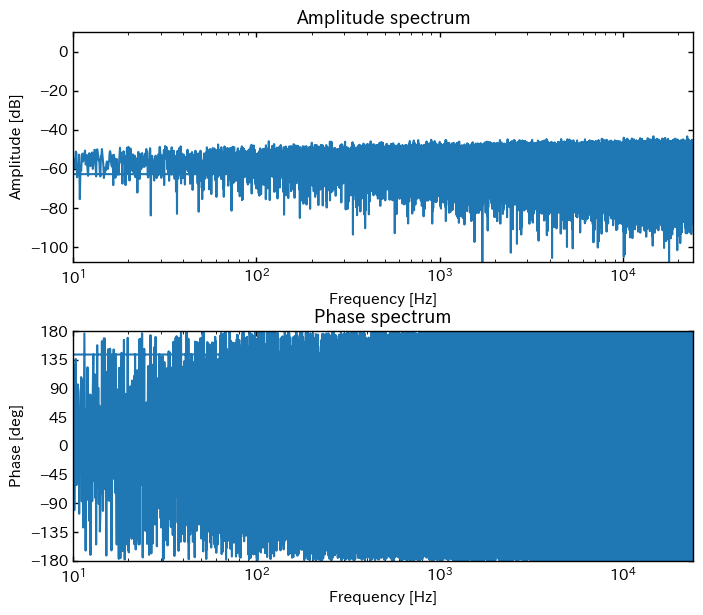

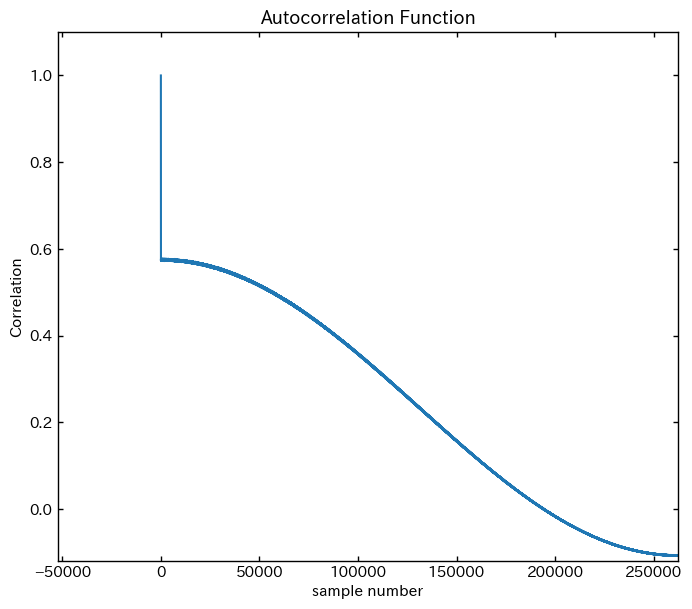

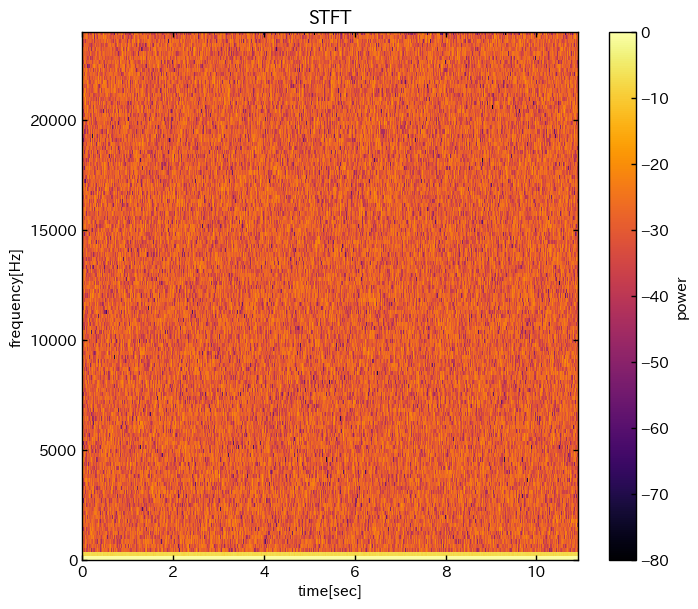

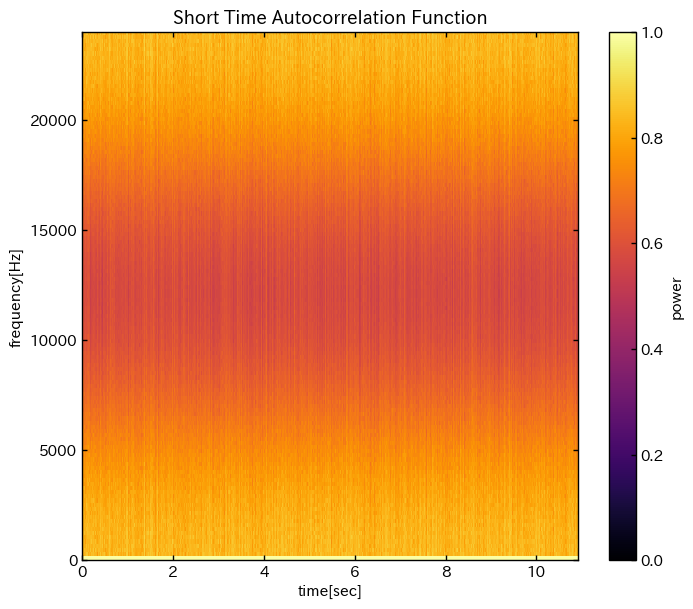

In [20]:
white_noise_gragh.plot_all()

## LPF設計 (fc = 3kHz)

In [21]:
# LPF設計 
filter3 = signal.firwin(numtaps=5001, cutoff=3000, width=None, 
                            window='hamming', pass_zero=True, 
                            scale=True, nyq=None, fs=fs)

In [22]:
white_noise_bef = signal.lfilter(b=filter3, a=1, x=white_noise)

In [23]:
white_noise_bef_gragh = research_tools.ResearchTools(y=white_noise_bef, fs=fs, fft_N=N, window="hamming")

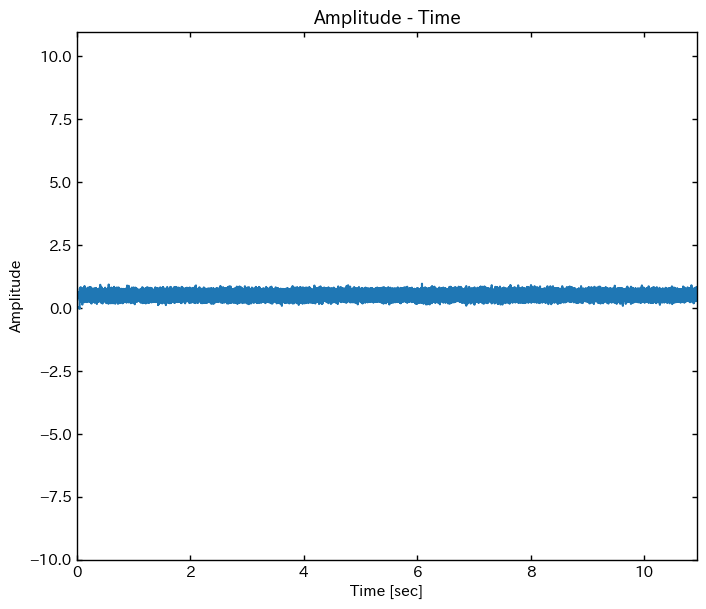

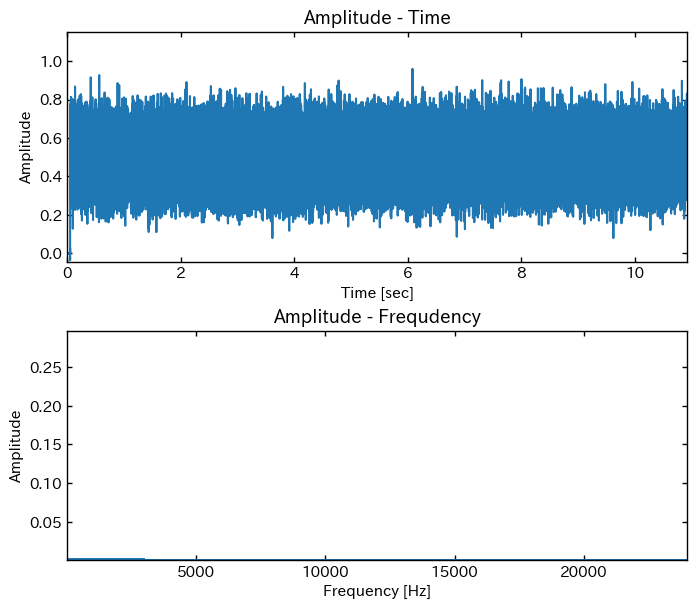

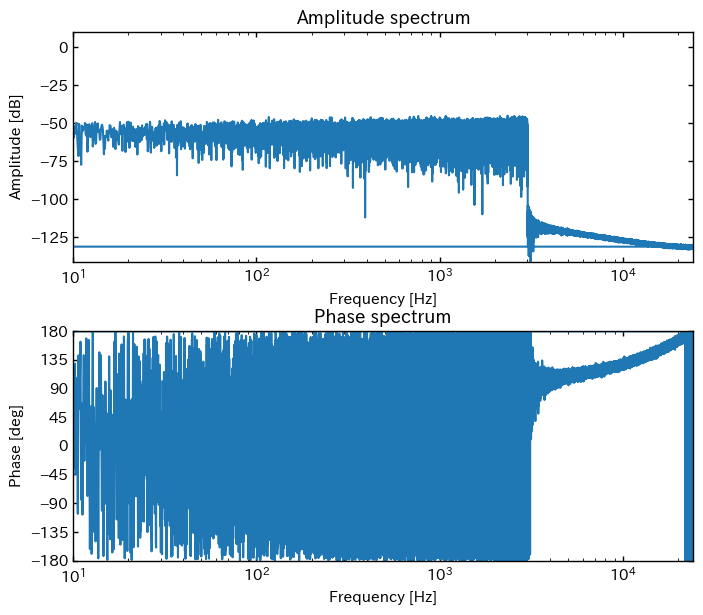

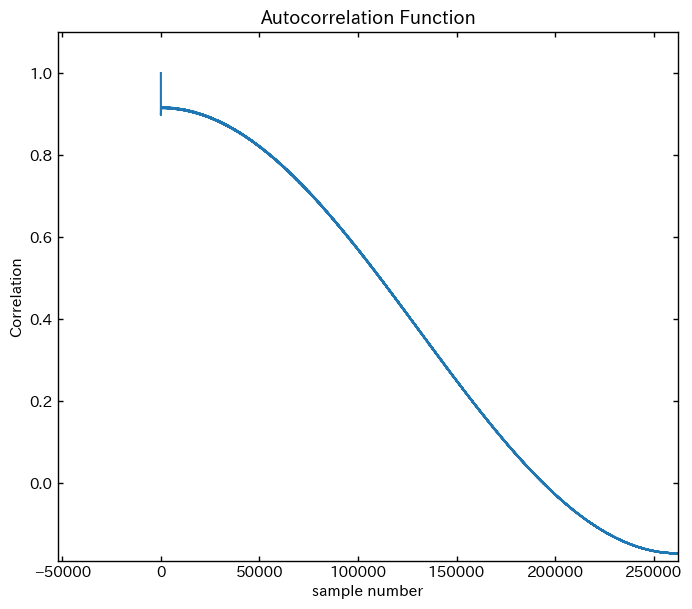

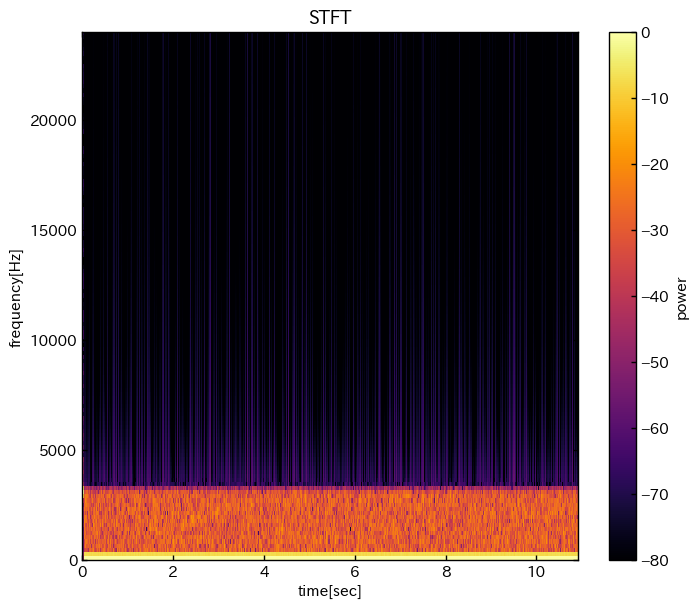

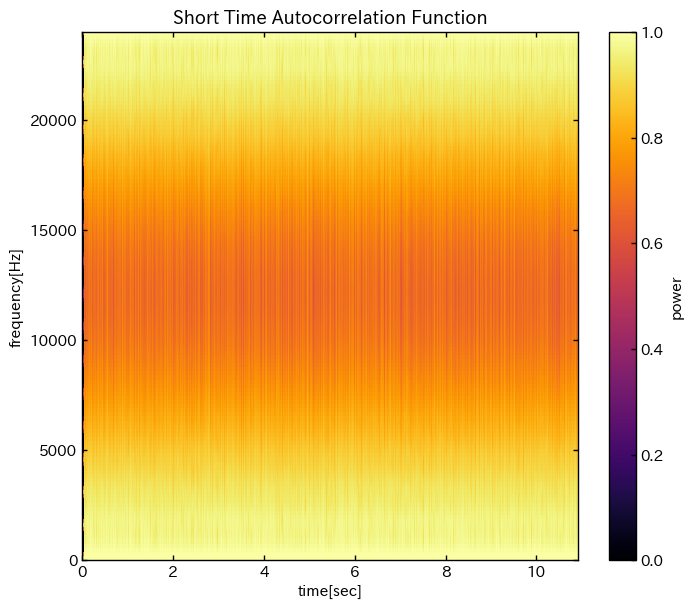

In [24]:
white_noise_bef_gragh.plot_all()